<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

Please copy the notebook (go to File and click create "Save a copy to ...") and work on that copy.

To submit, please submit a pdf of the page of your notebook (Ctrl + p on the page, save as pdf, and submit that pdf).

If you have any questions, please send them to the #homework2 slack channel.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Please don't import any packages. You only need `numpy` and `matplotlib` for this HW

# Overview

In this homework, you will learn to implement Batch Gradient Descent and Minibatch gradient Descent in various settings - Vanilla Regression, Logistic Regression, Multiclass logistic regression, and Poisson Regression. You will also learn how to compute loss gradients and negative log-likelihood functions.

This homework is a bit longer so please start early! A lot of these functions need to be implemented without loops which will require being familiar with broadcasting and numpy functions. So please brush up on numpy functions before starting the homework. Lastly, I haven't specified what the convergence condition should look like for the gradient descent algorithms. You can use either losses or the weights to determine when to stop the algorithm.

Also, note that we have provided code that adds the intercept vector to the design matrix $X$

# Loading Regression Data
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [110]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


california_housing = fetch_california_housing( return_X_y=True, as_frame=True)
X = california_housing[0]
y = california_housing[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc=StandardScaler()
X_transform=sc.fit_transform(X_train)

# Question 1 - Gradient Descent for OLS (10 points)

In lab, we implemented Gradient Descent for simple linear regression but what about multiple linear regression? It will help to first implement some helper functions.

## Part 1 - Helper functions (5 points)

Here we expect the implementation of:


1.   Predict function: It takes in $X$ matrix with dimensions $n \times p$ and $\widehat{w}$ of dimensions $p \times 1$ and outputs $\widehat{Y}$
2.   Loss function: It takes in $\widehat{Y}$, predictions, and $Y$, truth, and it outputs the loss.
3. Loss Gradient function: It takes in  $X$, $\widehat{w}$, and $Y$ and it outputs the loss gradient.

Implement all of these functions without loops

**NOTE:** The gradient and loss formula for Linear Regression can be found in the lecture slides.


In [111]:
#############################################################################
# TODO:                                                                     #
# Implement ordinary linear regression predict function                     #
# Input: X of shape (n, p), w of shape (p, 1)                               #
# Output: Yhat of shape (n, 1)                                              #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################
def ols_predict(X, w):
  Yhat = np.dot(X, w)
  return Yhat

#############################################################################
# TODO:                                                                     #
# Implement ordinary linear regression loss function                        #
# Input: Yhat of shape (n, 1), Y of shape (n, 1)                            #
# Output: loss                                                              #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def ols_loss(yhat, y):
  L = np.mean((yhat - y) ** 2)
  return L

#############################################################################
# TODO:                                                                     #
# Implement ordinary linear regression gradient function                    #
# Input: X of shape (n, p), w of shape (p, 1),                              #
#       y of shape (n, 1)                                                   #
# Output: gradient of shape (p, 1)                                          #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def ols_grad(X, w, y):
  Lgrad = (np.dot(np.dot(X.T, X), w) - np.dot(X.T, y)) / y.size
  return Lgrad



### Test Cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [112]:
np.random.seed(42)
ols_w = np.random.randn(X_transform.shape[1],1)
ols_preds = ols_predict(X_transform, ols_w)
print("Predictions: {}".format(ols_preds[np.random.randint(X_transform.shape[0], size = 5)]))
print("Loss: {}".format(ols_loss(ols_preds, np.array(y_train).reshape(np.array(y_train).shape[0], 1))))
print("Gradient: {}".format(ols_grad(X_transform, ols_w, np.array(y_train).reshape(np.array(y_train).shape[0], 1))[:5]))

Predictions: [[-0.07349033]
 [-0.69271285]
 [-0.54601967]
 [-1.97184046]
 [ 0.19788427]]
Loss: 11.77504413883068
Gradient: [[-0.32361707]
 [-0.56293901]
 [ 2.11406637]
 [ 2.25055689]
 [-0.42979886]]


## Part 2 - Gradient Descent (5 points)


Using the above helper functions, write an algorithm for gradient descent which will output $\widehat{w}$ and the training loss of the model using $\widehat{w}$ with a given $X$ matrix with dimensions $n \times p$, $Y$ vector with dimensions $n \times 1$, $\eta$ learning rate, $w_0$ initailization for $w$, and $\epsilon$ convergence condition. This algorithm should also plot the losses across all iterations (similar to lab)

Implement this using one loop for full credit.

In [113]:
#############################################################################
# TODO:                                                                     #
# Implement Gradient Descent for Linear Regression using the gradient.      #
# formula derived in class.                                                 #
# Input: X of shape (n, p), y of shape (n, ), eta,                          #
#        initial_w of shape ((p + 1), 1), epsilon                           #
# Output: w of shape ((p + 1), 1) and Training loss using that weight.      #
# Also plot your losses across all iterations                               #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def ols_grad_descent(X, y, eta, initial_w, epsilon):
  n, p = X.shape
  ones = np.ones((n, 1))
  new_X = np.hstack((ones, X))
  new_y = np.array(y).reshape((n, 1))

  # Initialize weights and loss history
  w = initial_w
  loss_history = []

  diff = 100

  while diff >= epsilon:
    # Predict
    yhat = ols_predict(new_X, w)
    # loss
    loss = ols_loss(yhat, new_y)
    # Store for plotting
    loss_history.append(loss)
    # Calculate gradient
    grad = ols_grad(new_X, w, new_y)
    # New weights
    w_new = w - eta * grad
    # update diff as the largest component difference in old and new weights
    diff = np.max(np.abs(w - w_new))
    # Update weights
    w = w_new

    # Plot the loss history
  plt.plot(loss_history)
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title('Loss over Iteration')
  plt.show()

  return w, loss_history[-1]




### Test Cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

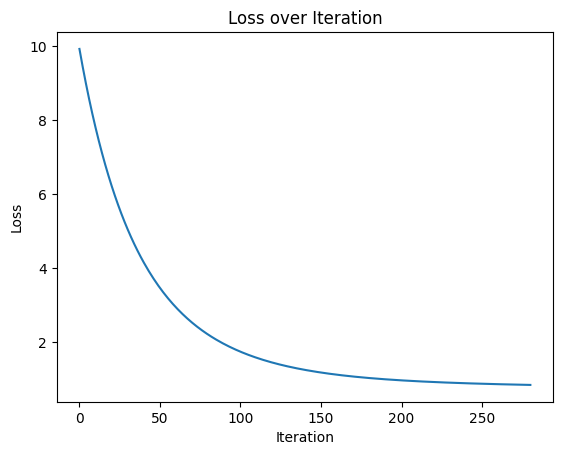

The training loss is 0.8353100275610454
The test loss is 0.8229862862651224
The weights are [[ 1.9758954 ]
 [ 0.45288759]
 [ 0.2612421 ]
 [ 0.76663813]
 [-0.69920947]
 [ 0.03469698]
 [ 0.0567321 ]
 [-0.15482331]
 [-0.06518961]]


In [114]:
np.random.seed(42)
new_p = X.shape[1] + 1
w_graddescent , loss = ols_grad_descent(X_transform, y_train, eta = 0.01, initial_w =np.random.randn(new_p,1), epsilon = 0.001)
pred_y_test = ols_predict(np.hstack((np.ones((X_test.shape[0], 1)), sc.transform(X_test))), w_graddescent)
new_y = np.array(y_test).reshape((y_test.shape[0], 1))
print("The training loss is {}".format(loss))
print("The test loss is {}".format(ols_loss(pred_y_test, new_y)))
print("The weights are {}".format(w_graddescent))

# Loading Binary Classification Data
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [115]:
from sklearn.datasets import load_breast_cancer

data_cancer = load_breast_cancer()
X_wis = data_cancer.data
y_wis = data_cancer.target
X_train_wis, X_test_wis, y_train_wis, y_test_wis = train_test_split(X_wis, y_wis, test_size=0.3, random_state=42)
sc_2=StandardScaler()
X_transform_wis =sc_2.fit_transform(X_train_wis)

# Question 2 - Gradient Descent for Logistic Regression for two labels (25 points)

The predictions for logistic regression are of the following form:

\begin{align*}
\widehat{y}_i &= \sigma_w(x_i) = \frac{e^{w^Tx_i}}{1 + e^{w^Tx_i}} \\
\widehat{Y} &= \begin{bmatrix} \widehat{y}_1 \\
\widehat{y}_2 \\
\vdots \\
\widehat{y}_n\end{bmatrix} \\
X &= \begin{bmatrix} x^T_1 \\
x^T_2 \\
\vdots \\
x^T_n \end{bmatrix}
\end{align*}
where $x_i$ is an instance of $X$ with dimensions $p \times 1$
Let's build a function that applies the sigmoid function to $X$ with dimensions $n \times p$ with a given $w$ ($p \times 1$) and it outputs $\widehat{Y}$ with dimensions $n \times 1$. Assume the intercept vector is already included in $X$

The loss function for logistic regression takes on the following form:

\begin{align*}
l_w(\widehat{y}_i, y_i) &= \left\{
  \begin{array}{lr}
        -\log(\widehat{y}_i), & \text{if } y_i = 1\\
        -\log(1 - \widehat{y}_i), & \text{if } y_i = 0
    \end{array}
  \right\} \\
  &= -y_i\log(\widehat{y}_i) - (1 - y_i)\log(1 - \widehat{y}_i))\\
  L(w) &= \frac{1}{n}\sum_{i =1}^n l_w(\widehat{y}_i, y_i)
\end{align*}

## Part 1 - Loss Gradient (10 points)

Using the loss function from above, find $\nabla_w L(w)$. You can either type your work for this part or upload a picture of your written work to this colab notebook

**Hint:** Use chain rule to find the gradient
\begin{align*}
\nabla_w L(w) = \frac{1}{n}\sum_{i = 1}^n \nabla_w l_w(\widehat{y}_i, y_i) &= \frac{1}{n} \sum_{i = 1}^n \frac{\partial l_w(\widehat{y}_i, y_i)}{\partial \widehat{y}_i}\frac{\partial \widehat{y}_i}{\partial w}
\end{align*}


Solution:

$$
  \frac{\partial l_w (\widehat{y_i}, y_i)}{\partial \widehat{y_i}} = -\frac{y_i}{\widehat{y_i}} + \frac{1-y_i}{1 - \widehat{y_i}}
$$

$$
  \frac{\partial \widehat{y_i}}{\partial w} = \frac{\partial (\frac{e^{w^Tx_i}}{1 + e^{w^Tx_i}})}{\partial w}
$$

Now we let $w^Tx_i$ be $z$, then $\frac{e^{w^Tx_i}}{1 + e^{w^Tx_i}}$ becomes $\frac{e^{z}}{1 + e^{z}}$. So:

$$
  \frac{\partial \widehat{y_i}}{\partial w} = \frac{ \partial (\frac{e^{z}}{1 + e^{z}})}{\partial z} \frac{\partial (w^Tx_i)}{\partial w}
$$

Since:

$$
  \frac{ \partial (\frac{e^{z}}{1 + e^{z}})}{\partial z} = \frac{e^z (e^z + 1) - e^z  e^z}{(e^z + 1)^2} = \frac{e^z}{e^z + 1} \frac{e^z + 1 - e^z}{e^z + 1} = \widehat{y_i} (1 - \widehat{y_i})
  \\\frac{\partial (w^Tx)}{\partial w} = x_i
$$

Therefore:

\begin{align*}
 \nabla_w L(w) \\&= \frac{1}{n}\sum_{i = 1}^n \nabla_w l_w(\widehat{y}_i, y_i)
\\&= \frac{1}{n} \sum_{i = 1}^n \frac{\partial l_w(\widehat{y_i}, y_i)}{\partial \widehat{y_i}}\frac{\partial \widehat{y_i}}{\partial w}
\\&= \frac{1}{n} \sum_{i = 1}^n (-\frac{y_i}{\widehat{y_i}} + \frac{1-y_i}{1 - \widehat{y_i}})(\widehat{y_i} (1 - \widehat{y_i})x_i)
\\&= \frac{1}{n} \sum_{i = 1}^n  (\widehat{y_i}-y_i)x_i
\end{align*}

## Part 2 - Helper functions (10 points)

Here we expect the implementation of:

1.   Predict/Sigmoid function: It takes in $X$ matrix with dimensions $n \times p$ and $\widehat{w}$ of dimensions $p \times 1$ and outputs $\widehat{Y}$

2.   Loss function: It takes in $\widehat{Y}$, predictions, and $Y$, truth, and it outputs the loss $L(w)$.
3.   Loss Gradient function: It takes in  $X$, $\widehat{w}$, and $Y$ and it outputs the loss gradient $\nabla_w L(w)$.



Implement all of these functions without loops


In [116]:
#############################################################################
# TODO:                                                                     #
# Implement the logistic regression predict function with the               #
# formula provided                                                          #
# Input: X of shape (n, p), w of shape (p, 1)                               #
# Output: predicted y of shape (n, 1)                                       #
#                                                                           #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def lr_predict(X, w):
  o_hat = np.dot(X, w)
  y_hat = 1 / (1 + np.exp(-1 * o_hat))
  return y_hat

#############################################################################
# TODO:                                                                     #
# Implement logistic regression loss function                               #
# Input: Yhat of shape (n, 1), Y of shape (n, 1)                            #
# Output: loss                                                              #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def lr_loss(yhat, y):
  loss = -np.mean(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
  return loss


#############################################################################
# TODO:                                                                     #
# Implement logistic regression gradient function                           #
# Input: X of shape (n, p), yhat of shape (p, 1),                           #
#       y of shape (n, 1)                                                   #
# Output: gradient of shape (p, 1)                                          #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def lr_grad(X, w, y):
  # compute yhat
  yhat = lr_predict(X, w)
  # gradient = partial derivative for the p label, size = p * 1
  grad = np.dot(X.T, (yhat - y)) / y.size
  return grad



### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [117]:
np.random.seed(42)
lr_w = np.random.randn(X_transform_wis.shape[1],1)
lr_preds = lr_predict(X_transform_wis, lr_w)
print("Predictions: {}".format(lr_preds[np.random.randint(X_transform_wis.shape[0], size = 5)]))
print("Loss: {}".format(lr_loss(lr_preds, y_train_wis.reshape(y_train_wis.shape[0], 1))))
print("Gradient: {}".format(lr_grad(X_transform_wis, lr_w, y_train_wis.reshape(y_train_wis.shape[0], 1))[:5]))

Predictions: [[0.99469177]
 [0.9843891 ]
 [0.87386242]
 [0.95225573]
 [0.6820093 ]]
Loss: 2.4714633113166826
Gradient: [[0.52396889]
 [0.16564895]
 [0.51780582]
 [0.48747272]
 [0.05212827]]


## Part 3 - Gradient Descent (5 points)

Using the three helper functions, write an algorithm for gradient descent for logistic regression which will output $\widehat{w}$ and the training loss of the model using $\widehat{w}$ with a given $X$ matrix with dimensions $n \times p$, $Y$ vector with dimensions $n \times 1$, $\eta$ learning rate, $w_0$ initailization for $w$, and $\epsilon$ convergence condition. This algorithm should also plot the losses across all iterations (similar to lab).

Implement this using one loop for full credit.

In [118]:
#############################################################################
# TODO:                                                                     #
# Implement Gradient Descent for Logistic Regression using the gradient.    #
# formula from above.                                                       #
# Input: X of shape (n, p), y of shape (n,), eta,                           #
#        initial_w of shape ((p + 1), ), epsilon                            #
# Output: w of shape ((p + 1), ) and Training loss using that weight.       #
# Also plot your losses across all iterations                               #
#                                                                           #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def lr_grad_descent(X, y, eta, initial_w, epsilon):
  n, p = X.shape
  ones = np.ones((n, 1))
  new_X = np.hstack((ones, X))
  new_y = np.array(y).reshape((n, 1))

  w = initial_w
  loss_history = []

  diff = 100

  while diff >= epsilon:
    # Predict
    yhat = lr_predict(new_X, w)
    # loss
    loss = lr_loss(yhat, new_y)
    # Store for plotting
    loss_history.append(loss)
    # Calculate gradient
    grad = lr_grad(new_X, w, new_y)
    # New weights
    w_new = w - eta * grad
    # update diff as the largest component difference in old and new weights
    diff = np.max(np.abs(w - w_new))
    # Update weights
    w = w_new


    # Plot the loss history
  plt.plot(loss_history)
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title('Loss over Iteration')
  plt.show()

  return w, loss_history[-1]



### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

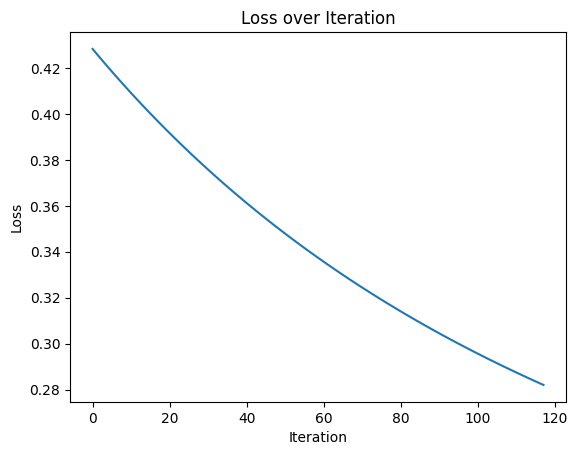

The training loss is 0.2820755047421334
The test loss is 0.26098241420321716
The weights of the first 10 variables are [[-0.23157579]
 [ 0.5394851 ]
 [ 1.4302763 ]
 [-0.31380058]
 [-0.26757906]
 [ 1.53663257]
 [ 0.68961796]
 [-0.55758056]
 [ 0.5332793 ]]


In [119]:
np.random.seed(42)
new_p = X_transform_wis.shape[1] + 1
w_graddescent_lr , loss_lr = lr_grad_descent(X_transform_wis, y_train_wis, eta = 0.01, initial_w =np.random.randn(new_p,1), epsilon = 0.001)
pred_y_test_lr = lr_predict(np.hstack((np.ones((X_test_wis.shape[0], 1)), sc_2.transform(X_test_wis))) , w_graddescent_lr)
new_y_lr = np.array(y_test_wis).reshape((y_test_wis.shape[0], 1))
print("The training loss is {}".format(loss_lr))
print("The test loss is {}".format(lr_loss(pred_y_test_lr, new_y_lr)))
print("The weights of the first 10 variables are {}".format(w_graddescent_lr[1:10]))

# Loading Multi-class data set
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [120]:
from sklearn.datasets import load_iris

data_iris = load_iris()
X_iris = data_iris.data
y_iris = data_iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
sc_3=StandardScaler()
X_transform_iris =sc_3.fit_transform(X_train_iris)

# Question 3: Logistic Regression with multiple labels (30 points)
Now, let's try to extend this idea to logistic regression with multiple labels. Like the previous question, let's start off with some helper functions.

## Part 1 - One Hot Encoding (5 points)

If we have a vector $z$ with dimensions $n \times 1$ that contains $m$ labels stored in $l$ with dimensions $m \times 1$, the one hot encoding algorithm should return an $n \times m$ matrix $Y$ where $Y_{ij}$ is 1 if $z_i = l_j$ else it is 0.
\begin{align*}
Y = \begin{bmatrix} y_1^T \\
y_2^T \\
\vdots \\
y_n^T \end{bmatrix} = \begin{bmatrix} y_{11} & \cdots & y_{1m} \\
y_{21} & \cdots & y_{2m}\\
\vdots & \vdots & \vdots \\
y_{n1} & \cdots & y_{nm} \end{bmatrix}
\end{align*}
where $y_i$ is $m \times 1$ vector and it contains the encodings of $z_i$


For example,
If
\begin{align*}
z = \begin{bmatrix} Sahana \\
Abhiti \\
Jake \\
Abhiti \\
Jake \\
Jake \\
Abhiti \end{bmatrix}, l = \begin{bmatrix} Sahana \\
Abhiti \\
Jake  \end{bmatrix}
\end{align*}
Then $Y$ would be
\begin{align*}
Y = \begin{bmatrix} 1 & 0 & 0 \\
0 & 1& 0\\
0 & 0 & 1\\
0 & 1& 0\\
0 & 0 & 1\\
0 & 0 & 1\\
0 & 1 & 0\\  \end{bmatrix}
\end{align*}

You can think of the 1st column checking whether $z_i$ is Sahana, 2nd column checking whether $z_i$ is Abhiti, and 3rd column checking whether $z_i$ is Jake.

Implement this one hot encoding algorithm that returns $Y$ ($n \times m$) given $z$ ($n \times 1$) and labels $l$ ($m \times 1$)

Implement this without loops for full credit.

**Note: In each row, only one entry can be 1**

In [121]:
#############################################################################
# TODO:                                                                     #
# Implement one hot encoding with a given y and l                           #
# Input: z of shape (n, 1), l of shape (m,1)                                #
# Output: Y of shape (n,m)                                                  #
#                                                                           #
#############################################################################

def one_hot_encoding(z, l):
  # use broadcasting to create n * m matrix,
  # with bool elements to judge whether the corresponding labels are the same
  Y = ((z == l.T).astype(int))
  return Y


### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [122]:
np.random.seed(42)
l = np.arange(3)
print(one_hot_encoding(y_iris.reshape((y_iris.shape[0], 1)), l)[np.random.randint(150, size = 10)])

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]]


## Part 2 - Predict/Softmax function (10 points)

Let's say there are $m$ possible labels. We can think of this problem as fitting $m$ logistic regression (2 label) models. We can fit a logistic regression model with each column in $Y$ from above against the same $X$. Let $w_j$ with dimensions $p \times 1$ be the the weights from fitting the $j^{th}$ column of $Y$ against $X$. Then,

\begin{align*}
W &= \begin{bmatrix} w_1^T \\
w_2^T \\
\vdots \\
w_m^T \end{bmatrix} \\
\mathbf{o}_i &=\begin{bmatrix} o_{i1} \\
o_{i2} \\
\vdots \\
o_{im} \end{bmatrix} = Wx_i
\end{align*}

\begin{align*}
\widehat{y}_{ij} &= softmax_{w_j} (x_i) = \frac{e^{w_j^Tx_i}}{\sum_{k = 1}^{m} e^{w_k^Tx_i}} = \frac{e^{o_{ij}}}{\sum_{k = 1}^{m} e^{o_{ik}}}\\
\widehat{y}_{i} &= \begin{bmatrix} softmax_{w_1} (x_i) \\
softmax_{w_2} (x_i) \\
\vdots \\
softmax_{w_m} (x_i) \end{bmatrix}
\end{align*}


Let's build a function that returns $\widehat{Y}$ ($n \times m$) with a given  X ($n \times p$) and a given $W$ ($m \times p$).

Implement this without loops for full credit.

\begin{align*}
\widehat{Y} = \begin{bmatrix} \widehat{y}_1^T \\ \widehat{y}_2^T \\ \vdots \\ \widehat{y}_n^T
\end{bmatrix}
\end{align*}

In [123]:
#############################################################################
# TODO:                                                                     #
# Implement the sigmoid function like the previous part with the full       #
# data set                                                                  #
# Input: X of shape (n, p), W of shape (m, p)                               #
# Output: Y of shape (n, m)                                                 #
#                                                                           #
# ONLY use numpy for this section! Deducting points for using loops         #
#############################################################################

def softmax(X, W):
  # Z: X * W.T, the o matrix, with n sample as row and m classes as col
  Z = np.exp(np.dot(X, W.T))
  # Z_sum: n * 1, sum of m classes
  Z_sum = np.sum(Z, axis=1, keepdims=True)
  # Y_hat, the softmax prediction
  Y_hat = Z / Z_sum
  return Y_hat


### Test Cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [124]:
np.random.seed(42)
mlr_W = np.random.randn(3, X_transform_iris.shape[1])
rands = np.random.randint(size = (10,),low = 0, high = X_transform_iris.shape[0])
result_pt2_1 = softmax(X_transform_iris[rands, :], mlr_W)
print(result_pt2_1)
assert (np.round_(np.sum(result_pt2_1, axis = 1), decimals = 3) == np.ones((10,))).all()

[[0.43429232 0.43766186 0.12804582]
 [0.00216385 0.0055293  0.99230685]
 [0.28916835 0.40919453 0.30163712]
 [0.73216265 0.26335625 0.0044811 ]
 [0.33520216 0.63791159 0.02688625]
 [0.62377346 0.32259633 0.05363021]
 [0.48255259 0.48611611 0.0313313 ]
 [0.6010133  0.39009259 0.00889411]
 [0.68510842 0.31173661 0.00315498]
 [0.66955727 0.31978378 0.01065895]]


## Part 3 - Other Helper functions (10 points)

Here we expect the implementation of:

1.   Loss function: It takes in $\widehat{Y}$, predictions, and $Y$, truth, and it outputs the loss $L(W)$.
2.   Loss Gradient function: It takes in  $X$, $\widehat{W}$, and $Y$ and it outputs the loss gradient $\nabla_W L(W)$.

We know from class that:
\begin{align*}
l_{W}(\widehat{y}_i, y_i) &= -\sum_{j = 1}^{m}y_{ij}\log(\sigma_{w_j}(x_i))\\
  L(W) &= \frac{1}{n}\sum_{i =1}^n l_{W}(\widehat{y}_i, y_i) \\
  \frac{\partial l_{W}(\widehat{y}_i, y_i)}{\partial w_j} &= x_i(\widehat{y}_{ij} - y_{ij})
\end{align*}

Implement the 1st function (loss function) without loops and for the 2nd function (gradient), you can use at most one loop

**Hint:** There are two approaches (that I can think of) -

1.   You can compute the gradient for each $w_j$ in $W$ using the derivative above (easier to do)
2.   Using the derivative above, Find $\nabla_W L(W)$ in matrix form and return that derviative (You wouldn't have to use loops for this implementation)


In [125]:
#############################################################################
# TODO:                                                                     #
# Implement multiclass logistic regression loss function                    #
# Input: Yhat of shape (n, m), Y of shape (n, m)                            #
# Output: loss                                                              #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def mlr_loss(Yhat, Y):
  loss = -np.mean(np.sum(Y * np.log(Yhat), axis=1))
  return loss

#############################################################################
# TODO:                                                                     #
# Implement multiclass logistic regression gradient function                #
# Input: X of shape (n, p), yhat of shape (p, 1),                           #
#       y of shape (n, 1)                                                   #
# Output: gradient of shape (p, 1)                                          #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def mlr_grad(X, W, Y):
  Yhat = softmax(X, W)
  grad = np.dot(X.T, (Yhat - Y)) / Y.shape[0]
  return grad


### Test Cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [127]:
np.random.seed(42)
mlr_W = np.random.randn(3, X_transform_iris.shape[1])
mlr_preds = softmax(X_transform_iris, mlr_W)
mlr_y_train = one_hot_encoding(y_train_iris.reshape(y_train_iris.shape[0], 1), np.arange(mlr_W.shape[0]))
print("Loss: {}".format(mlr_loss(mlr_preds, mlr_y_train)))
print("Gradient: {}".format(mlr_grad(X_transform_iris, mlr_W, mlr_y_train)))

Loss: 3.6323432591956495
Gradient: [[ 0.55433873  0.07628395 -0.63062268]
 [-0.32057624  0.09925996  0.22131628]
 [ 0.66894436  0.0799862  -0.74893056]
 [ 0.64984332  0.10583128 -0.7556746 ]]


## Part 4 - Gradient Descent (5 points)

Using this information, implement gradient descent algorithm which will output $\widehat{W}$ and the training loss of the model using $\widehat{W}$ with a given $X$ matrix with dimensions $n \times p$, $y$ vector with dimensions $n \times 1$, $\eta$ learning rate, $W_0$ initailization for $W$, and $\epsilon$ convergence condition. This algorithm should also plot the losses across all iterations (similar to lab).

Implement this in one loop for full credit

In [128]:
#############################################################################
# TODO:                                                                     #
# Implement Gradient Descent for Logistic Regression using the gradient.    #
# formula from above.                                                       #
# Input: X of shape (n, p), y of shape (n,), eta,                           #
#        initial_W of shape (m, (p + 1)), epsilon                           #
# Output: W of shape (m, (p + 1)) and Training loss using that weight.      #
# Also plot your losses across all iterations                               #
#                                                                           #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def mlr_grad_descent(X, y, eta, initial_W, epsilon):
  n, p = X.shape
  ones = np.ones((n, 1))
  new_X = np.hstack((ones, X))
  new_y = np.array(y).reshape((n, 1))

  # One-hot encode y
  classes = np.unique(new_y).reshape((-1, 1))
  Y = one_hot_encoding(new_y, classes)

  W = initial_W
  loss_history = []

  diff = 100

  while diff >= epsilon:
    # Compute the predictions using the softmax function
    Yhat = softmax(new_X, W)

    # Compute the loss
    loss = mlr_loss(Yhat, Y)
    loss_history.append(loss)

    # Compute the gradient
    grad = mlr_grad(new_X, W, Y)

    # Update the weights
    W_new = W - eta * grad.T

    # update diff
    diff = np.max(np.abs(W - W_new))

    # Update weights
    W = W_new

  # Plot the loss history
  plt.plot(loss_history)
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title('Loss over Iterations')
  plt.show()

  return W, loss_history[-1]


### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

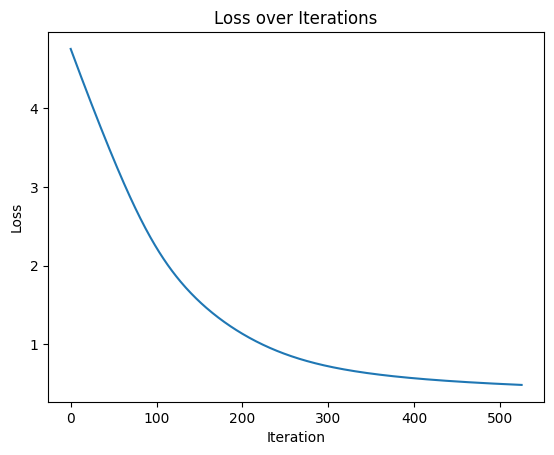

The training loss is 0.4829625638083119
The test loss is 0.4263542130747261
The weights are 
 [[-0.04972617 -0.84264785  1.41483788  0.30795698 -1.39950852]
 [ 0.03986585  0.79480578 -0.06962639 -0.96462587 -0.12878782]
 [-0.19098018  1.02306083  0.31187405 -0.20305589  0.11178517]]


In [129]:
np.random.seed(42)
new_p = X_transform_iris.shape[1] + 1
W_graddescent_mlr, training_loss_mlr = mlr_grad_descent(X_transform_iris, y_train_iris, eta = 0.01, initial_W =np.random.randn(3, new_p), epsilon = 0.001)
pred_y_test_mlr = softmax(np.hstack((np.ones((X_test_iris.shape[0], 1)), sc_3.transform(X_test_iris))) , W_graddescent_mlr)
new_Y_test_mlr = one_hot_encoding(y_test_iris.reshape((y_test_iris.shape[0], 1)) , np.arange(3))
print("The training loss is {}".format(training_loss_mlr))
print("The test loss is {}".format(mlr_loss(pred_y_test_mlr, new_Y_test_mlr)))
print("The weights are \n {}".format(W_graddescent_mlr))

# Simulating Poisson Regression data

In [130]:
np.random.seed(2)
n_pois = 3300
p = 5
X_pois = np.random.randn(n_pois, p)
X_pois = np.hstack([np.ones((n_pois, 1)), X_pois])
w_pois = np.random.randn(p + 1, 1)
pois_means =np.exp(X_pois @ w_pois)
y_pois = np.random.poisson(lam = pois_means.reshape(-1), size = n_pois)
X_pois = X_pois[:,1:]
X_train_pois, X_test_pois, y_train_pois, y_test_pois = train_test_split(X_pois, y_pois, test_size=0.3, random_state=42)

# Question 4: Poisson Regression (35 points)

From class, we know that the loss function of softmax regression is the negative log-likelihood.

We will now use this concept to compute the loss function for Poisson regression. Poisson regression is used for counts-based data. For example, if I want to predict the number of scoops of ice cream Mary will eat on a particular day given the temperature and humidity. If we fit a vanilla regression model to this, we may get negative predictions which won't be appropriate for this problem.

In the case of Poisson Regression, the predictions are now:

\begin{align*}
  \widehat{y}_i = e^{w^Tx_i}
\end{align*}

And under this model the $P(y_i | x_i)$ is:

\begin{align*}
  P(y_i | x_i) = \frac{\widehat{y}_i^{y_i}e^{-\widehat{y}_i}}{y_i !}
\end{align*}

Fun fact: The above probability is the probability under the Poisson Distribution with $\lambda = \widehat{y}_i$.

## Part 1 - Log-likelihood function (10 points)

Given the above information, show that the negative log-likelihood is:

\begin{align*}
-\log P\left(Y | X\right) = -Y^T\log \left(\widehat{Y}\right) + \widehat{Y}^T1_n + \log{Y!}^T1_n
\end{align*}
where
\begin{align*}
\widehat{Y} &= \begin{bmatrix} \widehat{y}_1 \\
\widehat{y}_2 \\
\vdots \\
\widehat{y}_n\end{bmatrix} \\
X &= \begin{bmatrix} x^T_1 \\
x^T_2 \\
\vdots \\
x^T_n \end{bmatrix}
\end{align*}
$\widehat{Y}$ has dimensions $n \times 1$, $X$ has dimensions $n \times p$, $w$ has dimensions $p \times 1$, and $1_n$ is an $n \times 1$ vector of 1's.

You can either type your work for this part or upload a picture of your written work to this colab notebook

**Hint**: If you have a vector $a$ of dimensions $k \times 1$ and you want to find the sum of all elements in $a$ or $\sum_{i = 1}^k a_i$, you would $a^T1_k$

Solution:

$$
P(Y|X) = \prod_{i=1}^{n} P(y_{i}|x_{i}) = \prod_{i=1}^{n} \frac{\widehat{y}_i^{y_i}e^{-\widehat{y}_i}}{y_i !}
$$

So:
\begin{align*}
 -\log P(Y|X) &=  \sum_{i=1}^{n} -\log\frac{\widehat{y}_i^{y_i}e^{-\widehat{y}_i}}{y_i !}
\\&= \sum_{i=1}^{n} -\log\widehat{y}_i^{y_i}e^{-\widehat{y}_i} - \sum_{i=1}^{n}-\log y_i !
\\&= \sum_{i=1}^{n} -y_i\log\widehat{y}_i -\sum_{i=1}^{n}-\widehat{y}_i\log e + \sum_{i=1}^{n}\log y_i !
\\&= \sum_{i=1}^{n} -y_i\log\widehat{y}_i +\sum_{i=1}^{n}\widehat{y}_i + \sum_{i=1}^{n}\log y_i !
\\&= -Y^T\log \left(\widehat{Y}\right) + \widehat{Y}^T1_n + \log{Y!}^T1_n
\end{align*}


## Part 2 - Loss Gradient (10 points)

Now that we have the loss function -
$$L(w) = \frac{-1}{n}\log P(Y | X)$$ where $n$ is the number of samples.
Find $\nabla_w L(w)$. Please make sure to simply the answer and write the solution in matrix form.

You can either type your work for this part or upload a picture of your written work to this colab notebook

Solution:
\begin{align*}
 L(w) &= \frac{-1}{n}\log P(Y | X)
\\&= -{1\over n}Y^T\log \left(\widehat{Y}\right) + {1\over n}\widehat{Y}^T1_n +{1\over n} \log{Y!}^T1_n
\\&= -{1\over n}Y^T Xw + {1\over n} (e^{Xw})^T1_n +{1\over n} \log{Y!}^T1_n
\end{align*}

Since $w$ does not depend on $- \log{Y!}^T1_n$,
\begin{align*}
  \nabla_w L(w) &= \nabla_w (-{1\over n}Y^T Xw +{1\over n} (e^{Xw})^T1_n)
  \\&= -{1\over n}X^T Y + {1\over n}\nabla_w((e^{Xw})^T1_n)
\end{align*}

Since
\begin{align*}
(e^{Xw})^T &= \begin{bmatrix} e^{x^T_1 \cdot w} \\
e^{x^T_2 \cdot w} \\
\vdots \\
e^{x^T_n \cdot w}\end{bmatrix} ^T
\end{align*}

\begin{align*}
  \nabla_w L(w)
  &= -{1\over n}X^T Y + {1\over n} X^Te^{Xw}
  \\&= {1\over n}X^T(e^{Xw} - Y)
\end{align*}

## Part 3 - Helper functions (5 points)

Here we expect the implementation of:


1.   Predict function: It takes in $X$ matrix with dimensions $n \times p$ and $\widehat{w}$ of dimensions $p \times 1$ and outputs $\widehat{Y}$
2.   Loss function: It takes in $\widehat{Y}$, predictions, and $Y$, truth, and it outputs the loss. Since the third term of the loss function $\log{Y!}^T1_n$ has nothing to do with $w$, we can drop that term, making the new loss function take this form
\begin{align*}
L(w) = -\frac{1}{n}Y^T\log \left(\widehat{Y}\right) + \frac{1}{n}\widehat{Y}^T1_n
\end{align*}
3. Loss Gradient function: It takes in  $X$, $\widehat{w}$, and $Y$ and it outputs the loss gradient.

Implement all of these functions without loops


In [256]:
#############################################################################
# TODO:                                                                     #
# Implement the poisson regression predict function with the                #
# formula provided                                                          #
# Input: X of shape (n, p), w of shape (p, 1)                               #
# Output: predicted y of shape (n, 1)                                       #
#                                                                           #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def pois_predict(X, w):
  return np.exp(X.dot(w))

#############################################################################
# TODO:                                                                     #
# Implement the poisson regression predict function with the                #
# Input: Yhat of shape (n, 1), Y of shape (n, 1)                            #
# Output: loss                                                              #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def pois_loss(yhat, y):
  return ((-np.dot(y.T, np.log(yhat)) + np.sum(yhat)) / y.size).item()

#############################################################################
# TODO:                                                                     #
# Implement the Poisson regression predict function with the                #
# Input: X of shape (n, p), yhat of shape (p, 1),                           #
#       y of shape (n, 1)                                                   #
# Output: gradient of shape (p, 1)                                          #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def pois_grad(X, w, y):
  return (-1/y.shape[0]) * np.dot(X.T, y - pois_predict(X, w))

### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [257]:
np.random.seed(21)
pois_w = np.random.randn(X_train_pois.shape[1],1)
pois_preds = pois_predict(X_train_pois, pois_w)
print("Predictions: {}".format(pois_preds[np.random.randint(X_train_pois.shape[0], size = 5)]))
print("Loss: {}".format(pois_loss(pois_preds, y_train_pois.reshape(y_train_pois.shape[0], 1))))
print("Gradient: {}".format(pois_grad(X_train_pois, pois_w, y_train_pois.reshape(y_train_pois.shape[0], 1))[:5]))

Predictions: [[5.85087325]
 [0.60813562]
 [6.3740955 ]
 [3.67165857]
 [1.39204563]]
Loss: 7.1535124708577795
Gradient: [[-1.84941456e+00]
 [ 3.97920054e-03]
 [ 5.13486131e+00]
 [-6.33795554e+00]
 [ 5.21775637e+00]]


## Part 4 - Mini Batch Gradient descent (10 Points)

Using the above helper methods, write an algorithm for mini batch gradient descent for Poisson regression which will output $\widehat{w}$ and the training loss of the model using $\widehat{w}$ with a given $X$ matrix with dimensions $n \times p$, $Y$ vector with dimensions $n \times 1$, $\eta$ learning rate, $w_0$ initailization for $w$, $|B|$ minibatch size, and $\epsilon$ convergence condition. This algorithm should also plot the losses across all iterations (similar to lab). Make sure to plot the loss of the model on the **full** data set as opposed to each minibatch.

Implement this using two loop for full credit.

**Hint:** It might be helpful to use the np.random.shuffle() function to shuffle the data (this has been implemented for you) and then use a for loop with $i$ going from 1 to $n / |B|$ and make a gradient descent step on the data from $i * |B|$th row to $(i + 1) * |B|$th row in the shuffled data set. If $|B|$ is not exactly divisible by the sample size, make the last minibatch of size $n \% |B|$ and change the update rule accordingly for the last minibatch.

In [258]:
#############################################################################
# TODO:                                                                     #
# Implement Mini batch Gradient Descent for Poisson Regression using        #
# the helper functions from above                                           #
# Input: X of shape (n, p), y of shape (n,), eta,                           #
#        initial_w of shape ((p + 1), 1), epsilon, batch_size               #
# Output: w of shape ((p + 1), 1) and Training loss using that weight.      #
# Also plot your losses across all iterations                               #
#                                                                           #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def mini_batch_grad_descent(X, y, eta, initial_w, epsilon, batch_size):
  n, p = X.shape
  ones = np.ones((n, 1))
  new_X = np.hstack((ones, X))
  new_y = np.array(y).reshape((n, 1))
  diff = 10000

  loss_history = []
  w = initial_w
  old_w = w
  # weight_new_batch = initial_w
  iteration = 0

  while (diff > epsilon):
    data = np.hstack((new_X, new_y))
    np.random.shuffle(data)

    # number of batches (excluding remain batch)
    num_batches = n//batch_size

    # detect remains
    remains = n % batch_size

    # initialize batches
    batches=[data[j * batch_size:(j+1)*batch_size] for j in range(num_batches)]

    # append remain batch
    batches.append(data[num_batches*batch_size:])

    # weight of a batch's loss in one iteration: same except the remain batch
    weights = np.full(num_batches + 1, batch_size / n)
    weights[-1]= remains / n

    # the loss this time
    batchloss = 0

    for i, batch in enumerate(batches):
      X_batch = batch[:, :-1]
      y_batch = batch[:, -1].reshape((-1, 1))
      yhat = pois_predict(X_batch, w)
      loss = pois_loss(yhat, y_batch)
      grad = pois_grad(X_batch, w, y_batch)
      w = w - eta * grad
      batchloss += loss * weights[i]

    # check difference and update w
    diff = np.max(np.abs(old_w - w))
    old_w = w

    # calculate the loss this batch, updating it in losses and iteration++
    batchloss /= len(batches)
    loss_history.append(batchloss)
    iteration += 1

  # ploting
  plt.plot(loss_history)
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title('Loss over Iterations')
  plt.show()
  return w, loss_history[-1]



### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

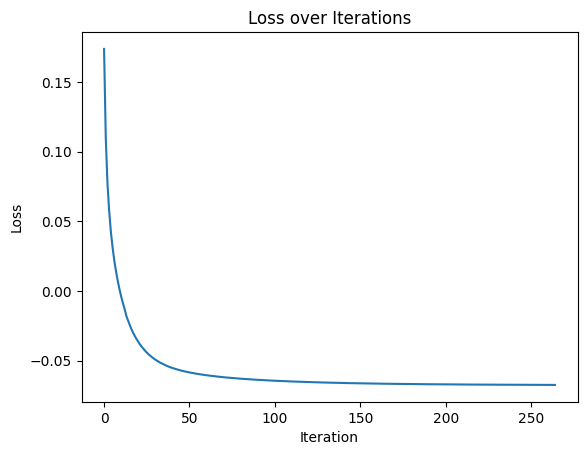

The training loss is -0.06730909105390788
The test loss is -1.2309660471349964
The weights are [[-0.94902827]
 [ 0.84488501]
 [-0.32198453]
 [ 0.43560532]
 [ 0.92023666]
 [-1.07850051]]


In [259]:
np.random.seed(42)
new_p = X_train_pois.shape[1] + 1
w_mini_pois, loss_pois = mini_batch_grad_descent(X_train_pois, y_train_pois, eta = 0.001, initial_w =np.random.randn(new_p,1), epsilon = 0.001, batch_size = 100)
pred_y_test_pois = pois_predict(np.hstack((np.ones((X_test_pois.shape[0], 1)), X_test_pois)), w_mini_pois)
print("The training loss is {}".format(loss_pois))
print("The test loss is {}".format(pois_loss(pred_y_test_pois, y_test_pois.reshape(y_test_pois.shape[0], 1))))
print("The weights are {}".format(w_mini_pois))